In [86]:
%matplotlib inline
import matplotlib.pyplot
import seaborn as sns
sns.set(rc={'figure.figsize':(15,6)})
import pandas as pd
from sklearn import tree

In [87]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display 
import pydotplus

from IPython.display import HTML
style = "<style>{width:50% !important; height:10% !important;}</style>"
HTML(style)

In [88]:
titanic_data = pd.read_csv('train.csv')

In [89]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)

In [92]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [93]:
y = titanic_data.Survived

In [94]:
X = pd.get_dummies(X)

In [95]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [96]:
X=X.fillna({'Age': X.Age.median()}) 

In [97]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [98]:
export = tree.export_graphviz(clf,feature_names=list(X),filled=True,class_names=['Died', 'Survived']) # наше дерево
graph = pydotplus.graph_from_dot_data(export)  
graph.write_png("titanic.png")

True

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [101]:
clf.score(X_test,y_test)

0.9966101694915255

In [102]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [103]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [104]:
clf.score(X_test,y_test)

0.8101694915254237

In [105]:
export = tree.export_graphviz(clf,feature_names=list(X),filled=True,class_names=['Died', 'Survived']) # наше дерево
graph = pydotplus.graph_from_dot_data(export)  
graph.write_png("titanic.png")

True

In [106]:
max_depth_values = range(1,100)

In [107]:
scores_data = pd.DataFrame()

In [108]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    mean_cross_val = cross_val_score(clf, X_train,y_train, cv=5).mean()
    test_score = clf.score(X_test,y_test)
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score],
                                   'test_score':[test_score],
                                   'cross_val_score':[mean_cross_val]})
    scores_data = scores_data.append(temp_score_data)

In [109]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.810169,0.796942


In [110]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score','test_score','cross_val_score'],
                          var_name='set_type',
                          value_name='score')

In [111]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [114]:
scores_data_long.query("set_type == 'cross_val_score'").head(5)

,max_depth,set_type,score
198,1,cross_val_score,0.781857
199,2,cross_val_score,0.768553
200,3,cross_val_score,0.788678
201,4,cross_val_score,0.783580
202,5,cross_val_score,0.796942


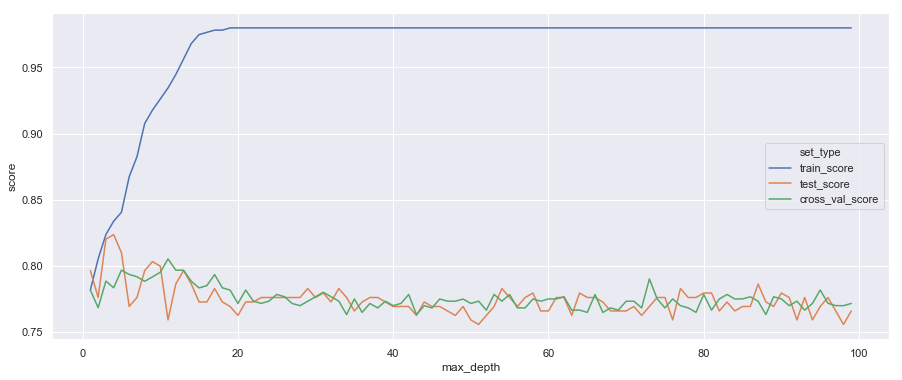

In [115]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [118]:
cross_val_score(best_clf, X_train,y_train, cv=5)

array([0.76666667, 0.80833333, 0.78991597, 0.74789916, 0.80508475])

In [119]:
cross_val_score(best_clf, X_train,y_train, cv=5).mean()

0.7835799743626264

-------------------------------------------

In [120]:
parametrs={'criterion':['gini', 'entropy'], 'max_depth' : range(1,10)}

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [123]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy', max_depth=99,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10)},
             pre_dispat

In [124]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [125]:
best_clf = grid_search_cv_clf.best_estimator_

In [126]:
best_clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [127]:
best_clf.score(X_test, y_test)

0.8101694915254237

In [135]:
from sklearn.metrics import  precision_score, recall_score

In [136]:
y_pred = best_clf.predict(X_test)

In [137]:
precision_score(y_test, y_pred)

0.7962962962962963

In [138]:
recall_score(y_test, y_pred)

0.7166666666666667

In [139]:
y_pred_proba = best_clf.predict_proba(X_test)

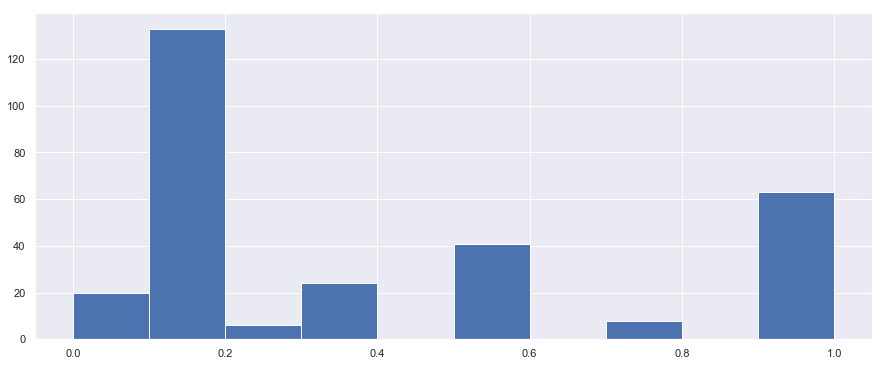

In [142]:
pd.Series(y_pred_proba[:,1]).hist()

In [145]:
import numpy as np
y_pred1 = np.where(y_pred_proba[:,1]>0.8, 1, 0)

In [146]:
precision_score(y_test, y_pred1)

0.9206349206349206

In [147]:
recall_score(y_test, y_pred1)

0.48333333333333334

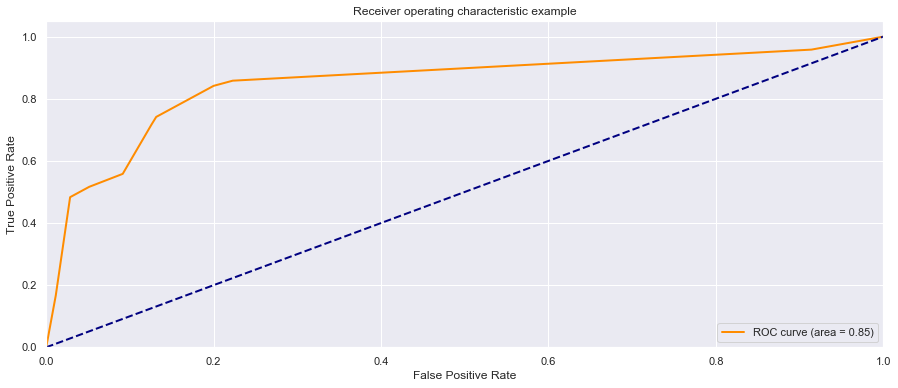

In [152]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
lw=2
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()